In [71]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plot
import numpy as np # álgebra linear
import os # acesso ao diretório
import pandas as pd # processamento dos dados .csv
import math
from starter_pack.func_analysis import plotPerColumnDistribution, plotCorrelationMatrix, plotScatterMatrix
import seaborn as sns

### Vamos verificar arquivo MIAS: /kaggle/input/csv/MIAS.csv

In [72]:
nRowsRead = 1000 # especifique 'None' se quiser ler o arquivo inteiro
# MIAS.csv pode ter mais linhas na realidade, mas estamos carregando/visualizando apenas as primeiras 1000 linhas
df5 = pd.read_csv('/home/rafatokairin/uni-programs/ic/csv/MIAS.csv', delimiter=',', nrows = nRowsRead)
df5.dataframeName = 'MIAS.csv'
nRow, nCol = df5.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 330 rows and 7 columns


Vamos dar uma olhada rápida em como os dados se apresentam:

In [73]:
df5.head(5)

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477.0,133.0,30.0


In [74]:
# dimensões do arquivo
df5.shape

(330, 7)

In [75]:
# informações do arquivo
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   REFNUM     330 non-null    object 
 1    BG        330 non-null    object 
 2    CLASS     330 non-null    object 
 3    SEVERITY  123 non-null    object 
 4    X         119 non-null    float64
 5    Y         119 non-null    float64
 6    RADIUS    119 non-null    float64
dtypes: float64(3), object(4)
memory usage: 18.2+ KB


In [76]:
df5.isnull().sum()

REFNUM         0
 BG            0
 CLASS         0
 SEVERITY    207
 X           211
 Y           211
 RADIUS      211
dtype: int64

Verificar os valores únicos em cada coluna

In [77]:
valores_unicos = []
for i in df5.columns[0:10].tolist():
    print(i, ':', len(df5[i].astype(str).value_counts()))
    valores_unicos.append(len(df5[i].astype(str).value_counts()))

REFNUM : 322
 BG : 3
 CLASS : 7
 SEVERITY : 3
 X : 106
 Y : 111
 RADIUS : 71


In [78]:
df5.describe()

,X,Y,RADIUS
count,119.000000,119.000000,119.000000
mean,488.605042,520.983193,48.848739
std,134.144131,178.828342,33.558863
min,127.000000,125.000000,3.000000
25%,398.500000,427.000000,27.000000
50%,505.000000,524.000000,41.000000
75%,574.500000,621.000000,61.500000
max,793.000000,994.000000,197.000000


Gráficos de distribuição (histograma/gráfico de barras) das colunas amostradas:

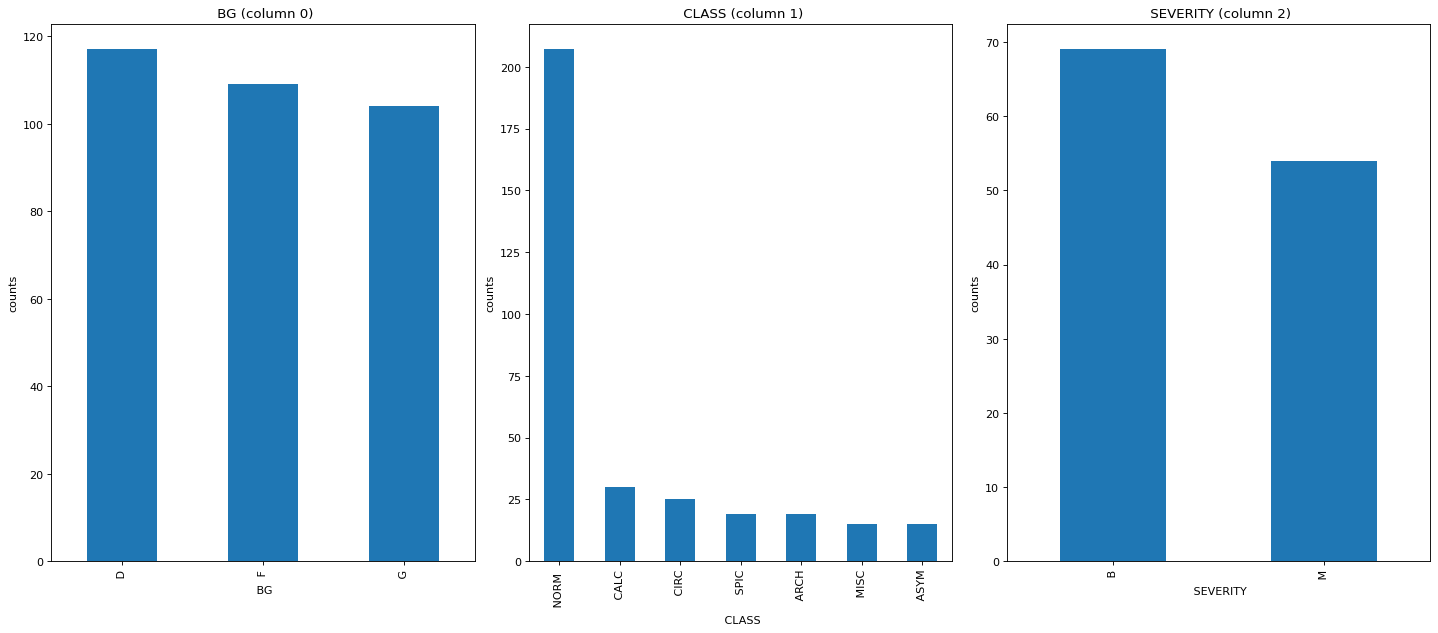

In [79]:
plotPerColumnDistribution(df5, 10, 5)

Matriz de correlação:

<Figure size 800x800 with 0 Axes>

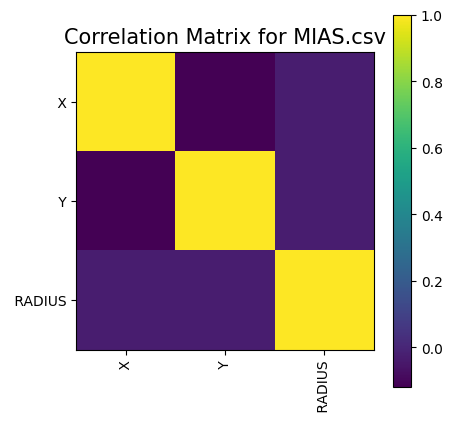

In [80]:
def plotCorrelationMatrixWithoutNaN(df, graphWidth):
    filename = getattr(df, 'dataframeName', 'Unnamed DataFrame')

    # Remover linhas com valores NaN
    df_cleaned = df.dropna(axis='rows')
    
    # Manter apenas colunas numéricas
    df_cleaned = df_cleaned.select_dtypes(include=[float, int])
    
    # Verificar se há colunas suficientes para calcular a correlação
    if df_cleaned.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN columns ({df_cleaned.shape[1]}) is less than 2')
        return
    
    # Calcular a matriz de correlação
    corr = df_cleaned.corr()
    
    # Plotar a matriz de correlação
    plt.figure(figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

plotCorrelationMatrixWithoutNaN(df5, graphWidth=10)


Gráficos de dispersão e densidade:

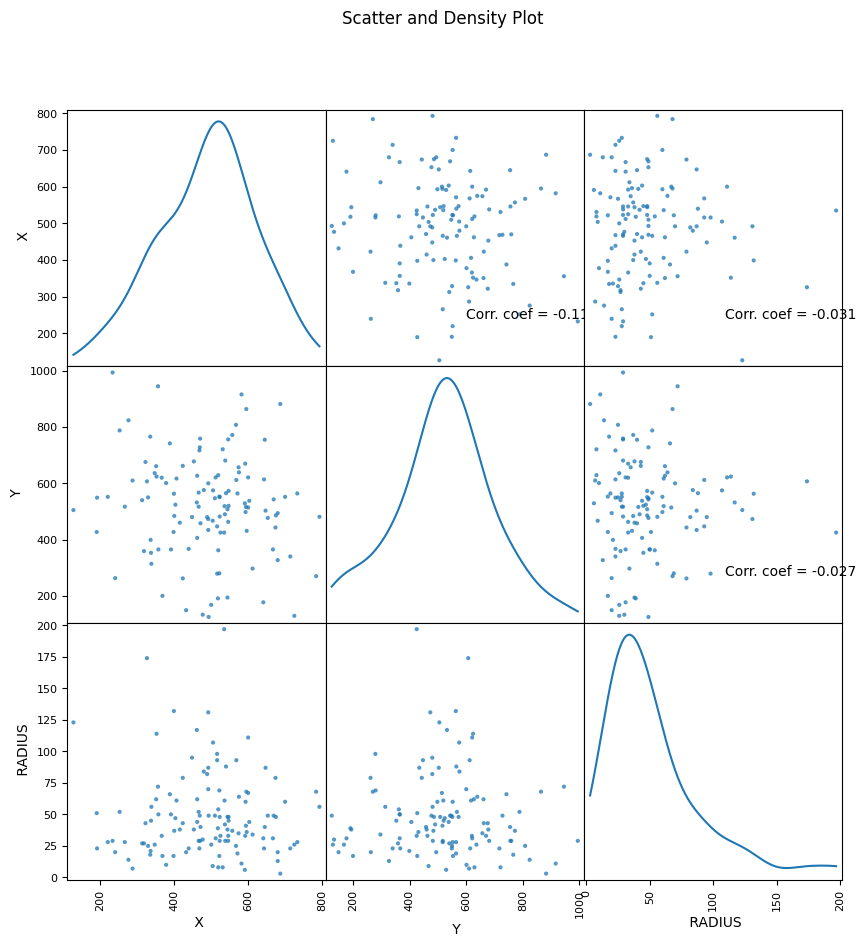

In [81]:
def plotScatterMatrixWithoutNaN(df, plotSize, textSize):
    # Remover linhas com valores NaN
    df_cleaned = df.dropna(axis='rows')
    
    # Manter apenas colunas numéricas
    df_cleaned = df_cleaned.select_dtypes(include=[np.number])
    
    # Manter colunas com mais de 1 valor único
    df_cleaned = df_cleaned[[col for col in df_cleaned if df_cleaned[col].nunique() > 1]]
    
    columnNames = list(df_cleaned)
    
    # Limitar o número de colunas para evitar problemas com inversão de matriz
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    
    df_cleaned = df_cleaned[columnNames]

    if df_cleaned.empty or len(df_cleaned.columns) < 2:
        print("The DataFrame does not have enough columns to create a scatter matrix.")
        return
    
    # Criar a matriz de dispersão
    ax = pd.plotting.scatter_matrix(
        df_cleaned, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde'
    )
    
    # Adicionar coeficientes de correlação na matriz
    corrs = df_cleaned.corr().values
    for i, j in zip(*np.triu_indices_from(corrs, k=1)):
        ax[i, j].annotate(
            f'Corr. coef = {corrs[i, j]:.3f}',
            (0.8, 0.2),
            xycoords='axes fraction',
            ha='center',
            va='center',
            size=textSize,
        )
    
    plt.suptitle('Scatter and Density Plot')
    plt.show()

plotScatterMatrixWithoutNaN(df5, plotSize=10, textSize=10)